In [55]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [ ]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = ""

In [88]:
path = "../data/"
reward_prefix = "wholesale_reward.csv"
action_prefix = "wholeale_action.csv"

In [ ]:
ANALYSIS_DIR = DATA_DIR / ANALYSIS_DIR_NAME

### Reward analysis

In [107]:
df_reward = pd.read_csv(os.path.join(path+reward_prefix))

In [108]:
df_reward_rolling = df_reward["reward"].rolling(20).mean().dropna()

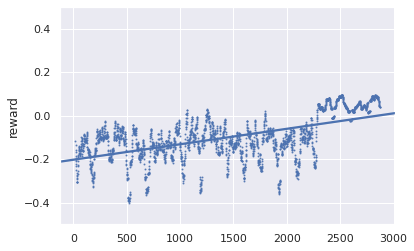

In [109]:
sns.set_theme()
sns.axes_style("darkgrid")
with sns.plotting_context({'lines.markersize': 1.0}):
    graph = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, ci=68, truncate=False,)
    graph.set(ylim=(-0.5, 0.5))
    

### Action analysis

In [34]:
df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
#df_reward["observation"] = df_reward["observation"].explode()

In [35]:
df_reward2 = pd.json_normalize(df_reward["observation"])

In [36]:
df_reward

,episode_id,reward,observation,last_action
0,62cc24ebe755459b943580c114fb8209,0.000000,"{""gameId"": ""is3start9"", ""timeslot"": 361, ""p_gr...",;-95.58945000171661;74.83580708503723;8.171367...
1,62cc24ebe755459b943580c114fb8209,0.001283,"{""gameId"": ""is3start9"", ""timeslot"": 362, ""p_gr...",;-143.65639686584473;82.76273012161255;-135.45...
2,62cc24ebe755459b943580c114fb8209,-0.005948,"{""gameId"": ""is3start9"", ""timeslot"": 363, ""p_gr...",;143.6410903930664;-95.60130834579468;-93.0602...
3,62cc24ebe755459b943580c114fb8209,-0.055053,"{""gameId"": ""is3start9"", ""timeslot"": 364, ""p_gr...",;-66.96096360683441;47.89464771747589;-109.293...
4,62cc24ebe755459b943580c114fb8209,-0.101168,"{""gameId"": ""is3start9"", ""timeslot"": 365, ""p_gr...",;19.597327709197998;-87.95825242996216;-6.2270...
...,...,...,...,...
287,bbec1de3351f4b908ba6ce7b7f2ae049,0.073990,"{""gameId"": ""is3start9"", ""timeslot"": 639, ""p_gr...",;-2.6776492595672607;77.32593417167664;-83.711...
288,bbec1de3351f4b908ba6ce7b7f2ae049,0.115188,"{""gameId"": ""is3start9"", ""timeslot"": 640, ""p_gr...",;-121.0880845785141;96.15246057510376;-127.275...
289,bbec1de3351f4b908ba6ce7b7f2ae049,-0.173453,"{""gameId"": ""is3start9"", ""timeslot"": 641, ""p_gr...",;-107.04706907272339;11.772847175598145;93.982...
290,bbec1de3351f4b908ba6ce7b7f2ae049,-0.026825,"{""gameId"": ""is3start9"", ""timeslot"": 642, ""p_gr...",;58.24141502380371;-62.432658672332764;4.13154...


In [37]:
test = df_reward["observation"].iloc[df_reward.index>1500]
test.info()

<class 'pandas.core.series.Series'>
Int64Index: 0 entries
Series name: observation
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 0.0+ bytes


In [38]:
temp = []
for row in test:
    test_row= json.loads(row)
    break

In [39]:
from typing import List

temp_row = []
test_row.get("gameId")
i=0
for row in test:

    test_row=json.loads(row)
    for x in test_row:

        
        temp_row.append(test_row[x])




tempdf = pd.DataFrame(np.array(temp_row).reshape((-1,17)))


    

NameError: name 'test_row' is not defined

In [ ]:
list_columns = [2,3,4,5,6,7,8,9,10,11,14,15,16]

new_df = pd.DataFrame()

for x in list_columns:

    y = pd.DataFrame(tempdf[x].tolist())



In [40]:
lista = [1,2,3,4,5]
tempdf[lista].columns

NameError: name 'tempdf' is not defined

In [ ]:
tempdf.explode(2,)

NameError: name 'tempdf' is not defined

In [41]:
test.apply(lambda x: print(json.loads(x)).get("gameId"))



Series([], Name: observation, dtype: object)

In [80]:
from numpy import result_type
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")


df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names

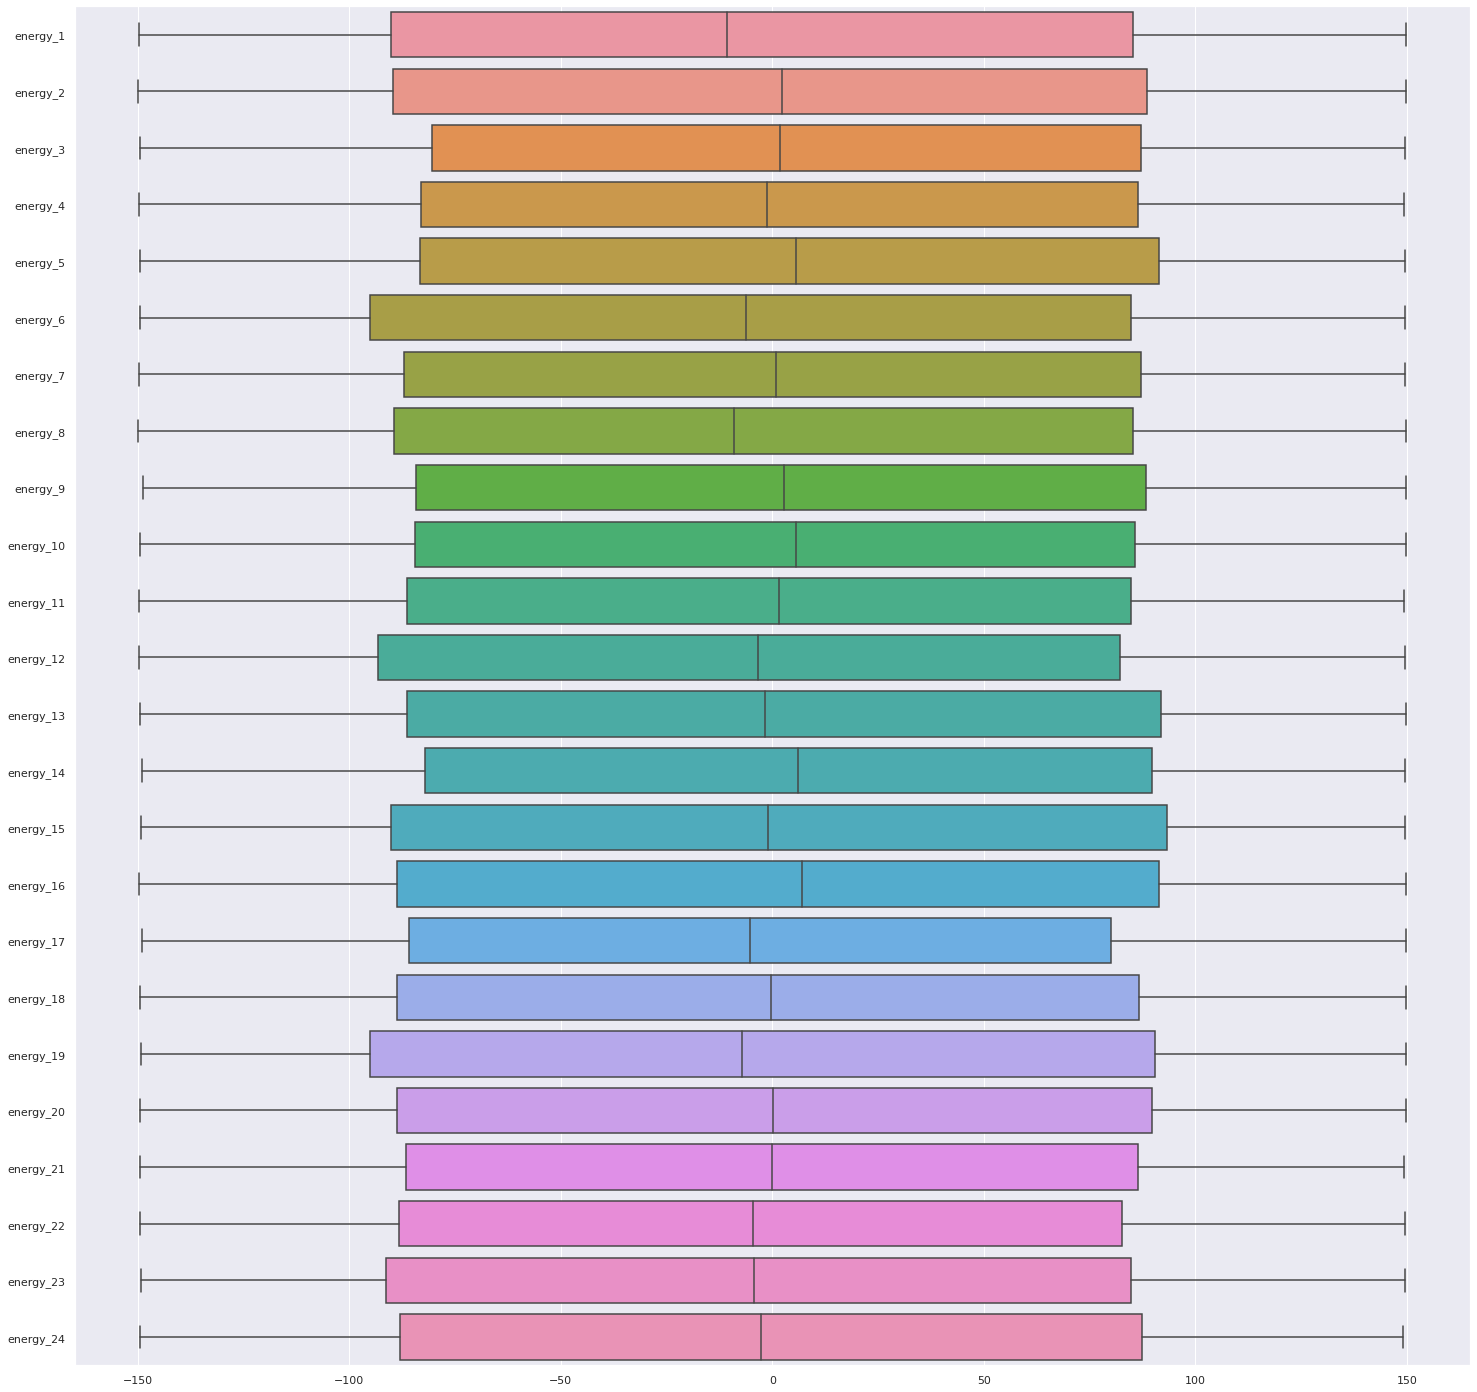

In [81]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[energy], orient="h")

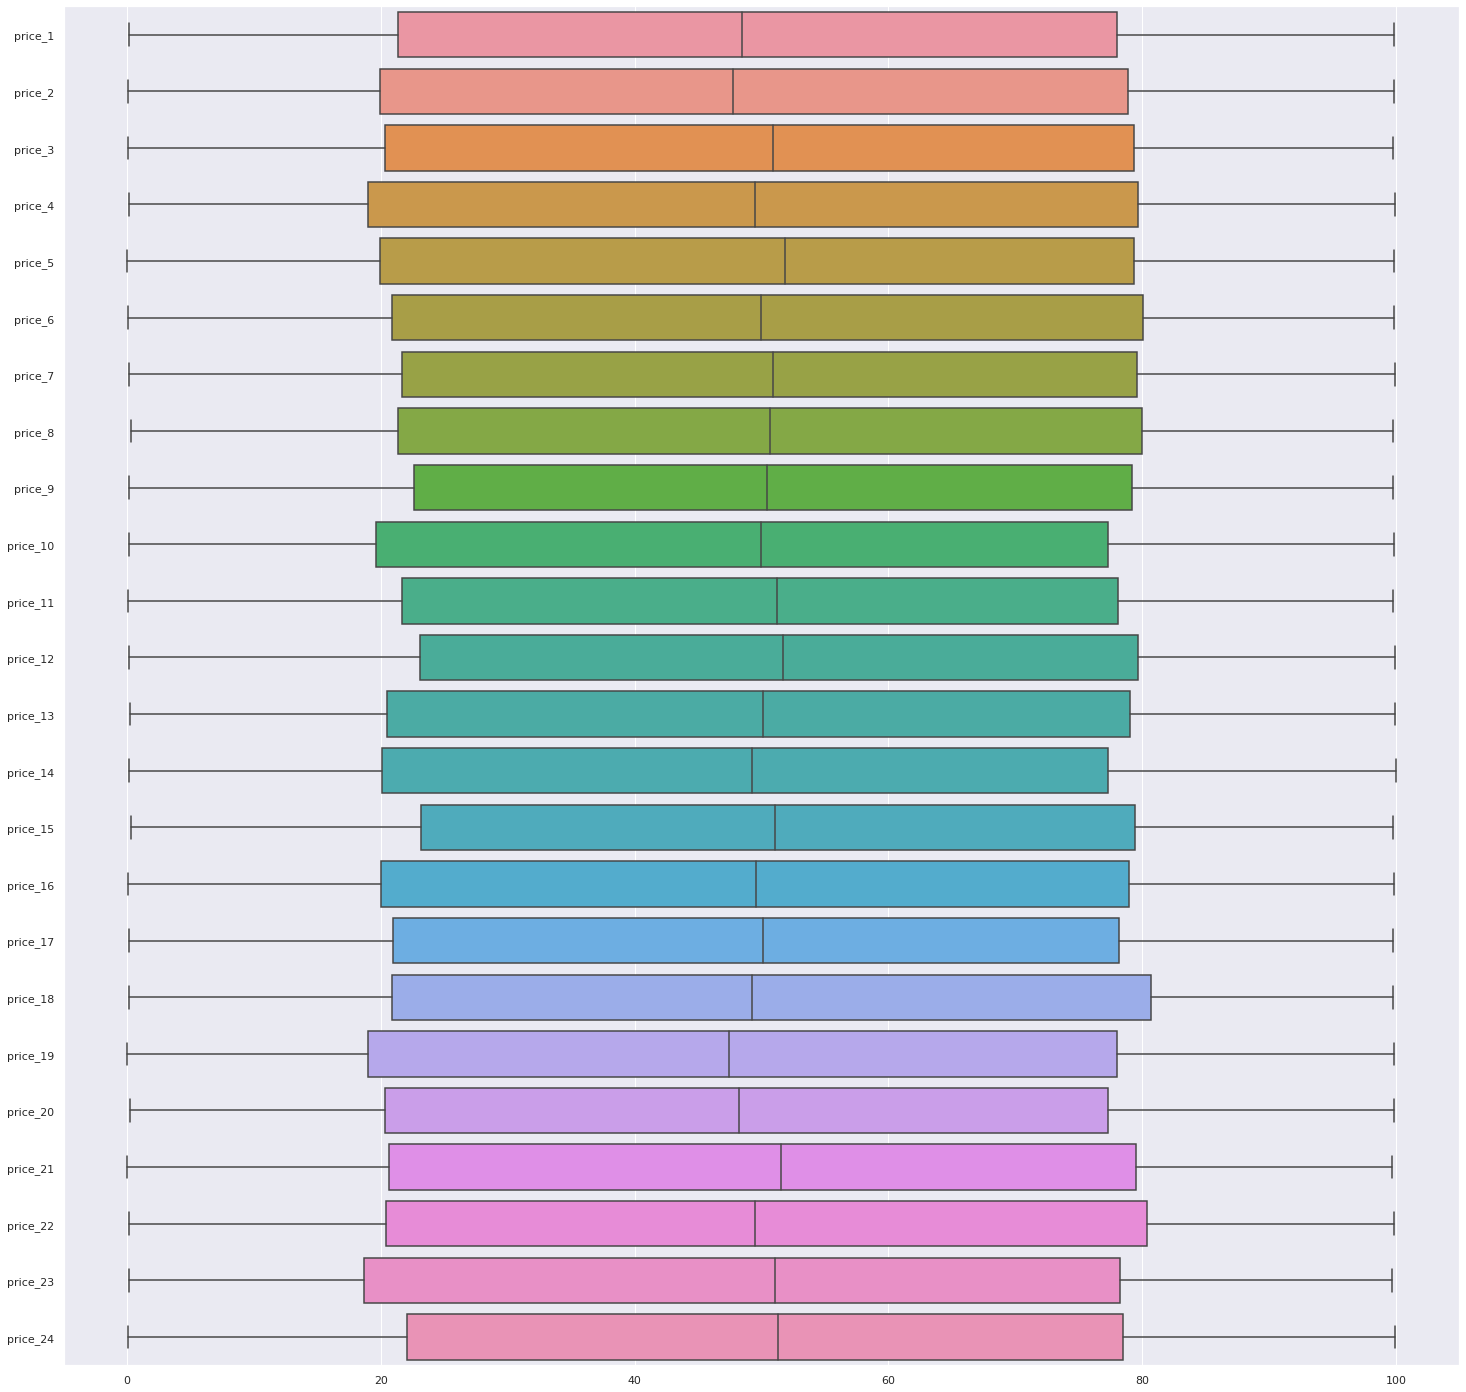

In [84]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[price],  orient="h")

In [83]:

for i in range(0,24,1):
    print(df_action[df_action[price[i]] >=0])

        energy_1    price_1    energy_2    price_2    energy_3    price_3  \
0     -95.589450  74.835807    8.171368 -78.039998   30.717158  -8.738491   
1    -143.656397  82.762730 -135.454059  62.378252   87.234199 -53.947341   
3     -66.960964  47.894648 -109.293723  25.740027 -145.310497   7.925338   
6     -57.759333   0.779197  127.466476 -12.562951   45.044678 -79.906368   
9     -37.034771  43.351609  -15.485859  27.408656  -22.358510  21.562579   
...          ...        ...         ...        ...         ...        ...   
1403 -135.060355  90.129369 -101.654559  76.075625  147.478545 -89.948469   
1405  -76.157364  94.678688   20.246547 -58.973223  -58.756238  21.610260   
1412  -87.634268  74.082601 -124.851179  27.349424 -136.042410  49.135667   
1414  -11.612946  20.024469   -1.127476  61.390644   76.640350 -55.103910   
1415  -97.518423  59.272647  124.253422 -24.892548  -59.360388  96.361136   

        energy_4    price_4    energy_5    price_5  ...   energy_20  \
0   